In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
from joblib import load
from sklearn.preprocessing import StandardScaler

In [2]:
# Laden des SVM-Modells
svm_with_kernel = load('svm_with_kernel.joblib')

# Laden des PCA-Transformers
pca_transformer = load('pca_transformer.joblib')

# Laden des StandardScalers, falls verwendet
scaler = load('scaler.joblib')  # Ersetzen Sie dies durch den tatsächlichen Namen der Datei, in der Ihr Scaler gespeichert ist

In [3]:
def load_and_preprocess_images(folder_path, scaler, pca_transformer, dim=100):
    processed_images = []
    original_images = []
    
    for image_path in glob.glob(os.path.join(folder_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image_resized = cv2.resize(image, (dim, dim))
        image_resized = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        original_images.append(image_resized)
        processed_images.append(image_resized.flatten())

    processed_images = np.array(processed_images)
    processed_images_scaled = scaler.transform(processed_images)
    images_transformed = pca_transformer.transform(processed_images_scaled)
    return images_transformed, original_images

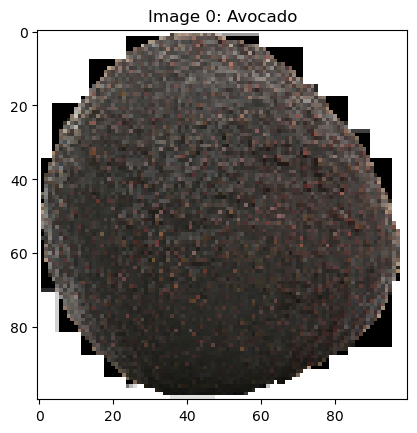

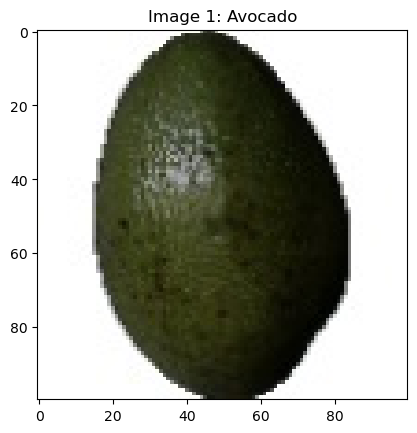

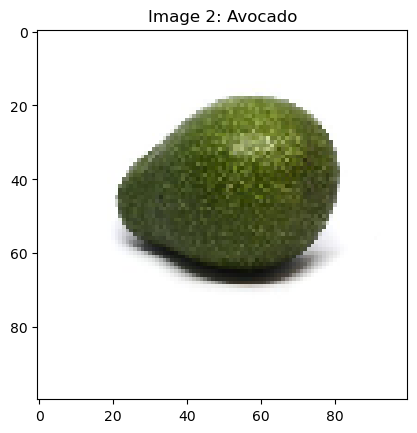

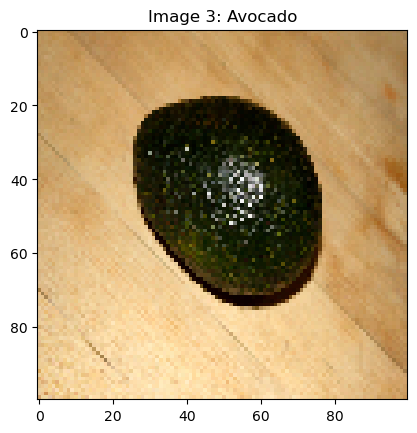

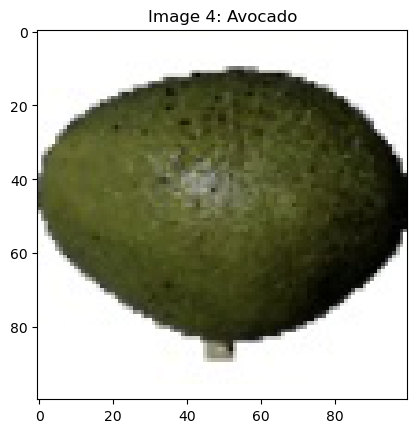

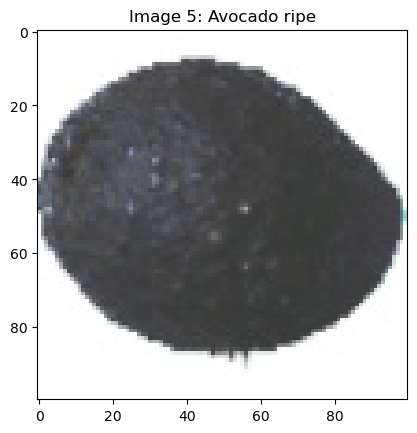

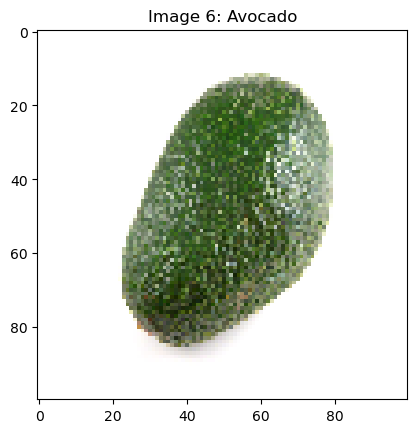

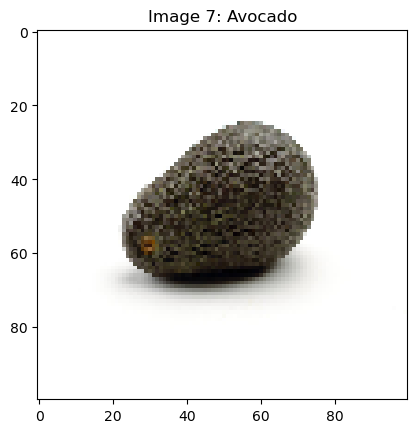

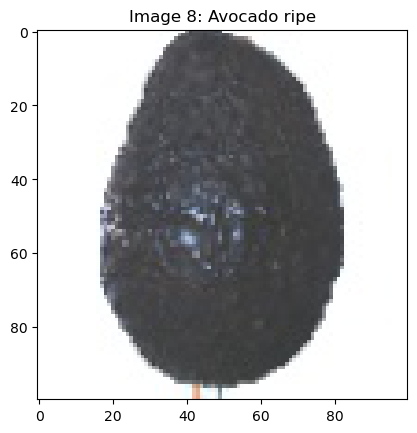

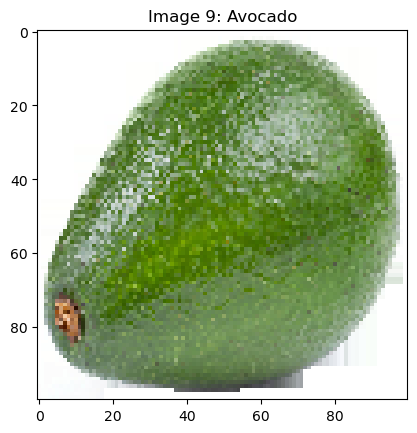

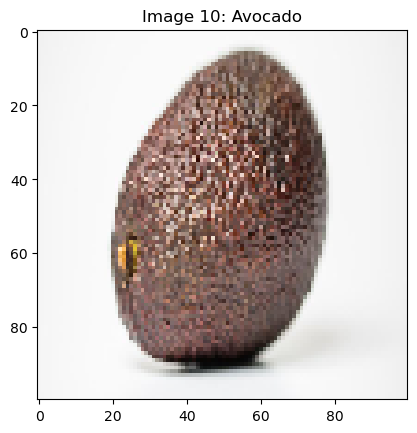

In [4]:
# Pfad zu neuen Bildern
validation_images_path = '/Users/frederik/Code/SVM/Notebooks/SVM/Fruits/frutis_360/fruits-360_dataset/fruits-360/Validierung'

# Laden und Vorverarbeiten der Bilder
new_images_transformed, original_images = load_and_preprocess_images(validation_images_path, scaler, pca_transformer)

# Klassifizieren der Bilder
predicted_labels = svm_with_kernel.predict(new_images_transformed)

# Zuordnung von Labels zu Namen
label_names = {0: 'Avocado ripe', 1: 'Avocado'}

# Anzeigen der Bilder mit Vorhersagen
for i, (image, label) in enumerate(zip(original_images, predicted_labels)):
    plt.imshow(image)
    plt.title(f'Image {i}: {label_names[label]}')
    plt.show()